**Daniel Yu**

CS 251/2: Data Analysis and Visualization

Spring 2024

Project 3: Clustering

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import kmeans

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)


# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 2: Image Segmentation and compression

In this task, you will apply K-means to one image and to compress it (*image compression*). The idea is that you will find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. This will compress an image, by only using $k$ colors to represent it. You can also think of this as doing a simple image region segmentation: regions with similar colors will belong to the same cluster. It also makes some cool retro effects!

### 2a. Load in baby bird image

- Use the imported `imread` method below to load in the `baby_bird.jpg` image.
- Use `plt.imshow` to display it in the notebook below. Turn off plot ticks!

In [2]:
from matplotlib.image import imread

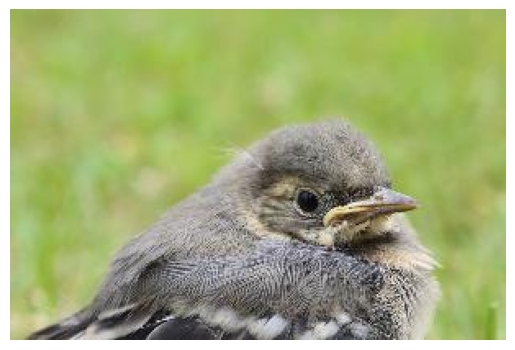

In [12]:
image = plt.imread('data/baby_bird.jpg')
plt.xticks([])
plt.yticks([])
imageplot = plt.imshow(image)

### 2b. Preprocess image

- Fill in the function below to collapse (flatten) the 2D image into a big 1D vector of RGB values. For example, for the bird image, your function should take the shape `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`.
- Reshape the bird image from `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`. Final shape for baby bird image should be: `(61206, 3)`

In [4]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    num_rows, num_cols, rgb = img.shape
    return np.reshape(img, (num_rows*num_cols, rgb))
    pass

In [5]:
print(image.shape)
flatten_image = flatten(image)
print("Flatten image shape:", flatten_image.shape)

(202, 303, 3)
Flatten image shape: (61206, 3)


### 2c. Cluster RGB values in image

- Run K-means on the bird data vector.
- Implement `replace_color_with_centroid`: replace every pixel in the image with the nearest centroid RGB value.
- Compress the image by running `replace_color_with_centroid`.

In [6]:
bird_data = kmeans.KMeans(np.array(flatten_image))
bird_data.cluster(2)
bird_data.replace_color_with_centroid()

### 2d. Postprocessing and visualization

- Rehape the compressed image data back to its original dimensions.
- Plot it below.

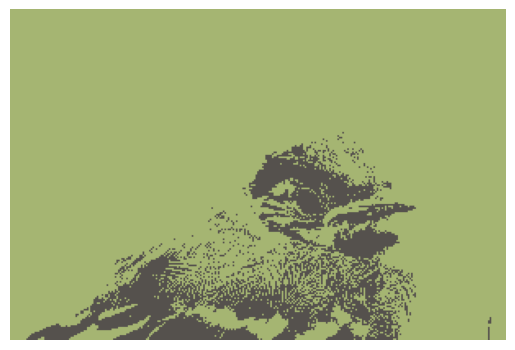

In [8]:
orig_image = np.reshape(bird_data.data, (202, 303, 3))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)
imageplot = plt.imshow(orig_image);

### 2e. Run K-means and compress an image of your choice

Smaller images run a lot faster.

(17290, 3)


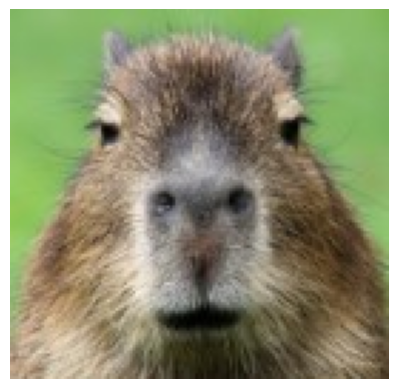

In [22]:
image_2 = plt.imread("data/capybara.jpg")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)
plt.imshow(image_2);
flat_image2 = flatten(image_2)
print(flat_image2.shape)

In [23]:
capy_data = kmeans.KMeans(np.array(flat_image2))
capy_data.cluster(2)
capy_data.replace_color_with_centroid()

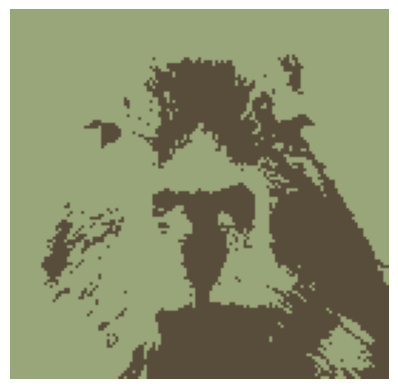

In [31]:
orig_image2 = np.reshape(capy_data.data, (130, 133, 3))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)
img = plt.imshow(orig_image2);

# EXTENSIONS #

## PART 1: IMAGE COMPRESSION

It seems like intuitively, having more clusters in an image will decrease the compression ratio. The more clusters you have, the more centroids you need to store, and each centroid requires storage space. In this case, we are storing colors, so if we have more clusters or colors, we have a lot more pixel information to save, so we get a higher resolution at the cost of having a large size. A higher compression ratio means more compression (and more loss of information), while a lower compression ratio means less compression.

Let's test that with a cheesburger.

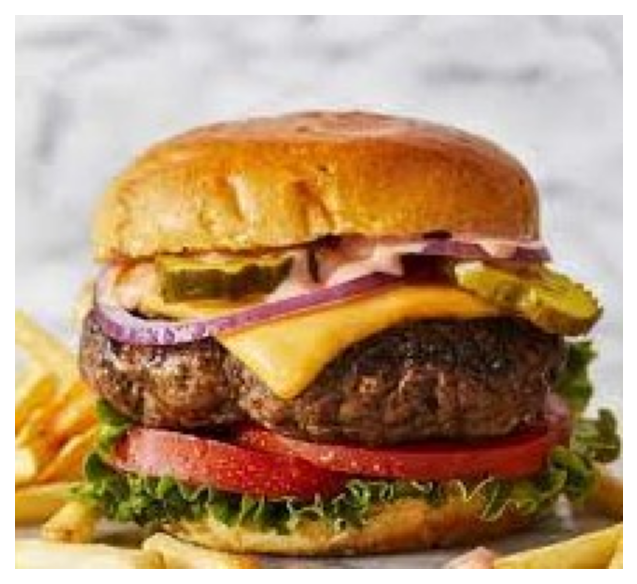

In [212]:
new_image = plt.imread("data/cheeseburger.jpg")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)
plt.imshow(new_image);
plt.savefig('original.jpg', bbox_inches = 'tight', pad_inches = 0)
flat_image = flatten(new_image)

In [190]:
burger_data = kmeans.KMeans(np.array(flat_image))

To find the compression ratio, I simply divided the original image's bytes by the resulting image after all the clusters when reshaping.

For some reason there's this weird size increase when using plt.savefig, in which there was some extra white space, but we can go past that by saving the original image as well.

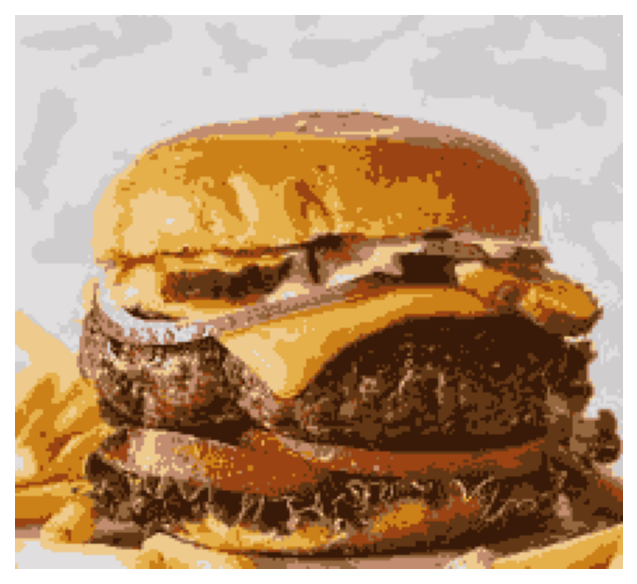

In [208]:
burger_data = kmeans.KMeans(np.array(flat_image))
burger_data.cluster(2)
burger_data.replace_color_with_centroid()
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)
compressedburger = np.reshape(burger_data.data, (198, 217, 3))
plt.imshow(compressedburger);
plt.savefig('compressed.jpg', bbox_inches = 'tight', pad_inches = 0)


burger_data = kmeans.KMeans(np.array(flat_image))
burger_data.cluster(5)
burger_data.replace_color_with_centroid()
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)
compressedburger = np.reshape(burger_data.data, (198, 217, 3))
plt.imshow(compressedburger);
plt.savefig('compressed2.jpg', bbox_inches = 'tight', pad_inches = 0)


burger_data = kmeans.KMeans(np.array(flat_image))
burger_data.cluster(10)
burger_data.replace_color_with_centroid()
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)
compressedburger = np.reshape(burger_data.data, (198, 217, 3))
plt.imshow(compressedburger);
plt.savefig('compressed3.jpg', bbox_inches = 'tight', pad_inches = 0)

Now let's compare them!

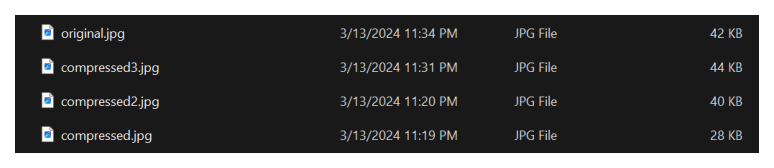

In [213]:
filesizes = plt.imread("Screenshot 2024-03-13 233649.png")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(False)
plt.imshow(filesizes);

We can calculate the compression ratio using these file sizes, as follows:

2 Color Clustering: 42kb / 28kb = 1:.666667

5 Color Clustering: 42kb / 40kb = 1:0.952380952

10 Color Clustering 42kb / 44kb = 1:1.04761905

Disregarding as to why the 10 Color Clustering has a bigger filesize than the original, it seems like the more clusters there are, the larger the filesize.

From these results, they support my hypothesis that an increase in k, results in a lesser reduction in space, as the ratio decreased when the k values increased. This is since a higher compression ratio allows for less storage space required to store an image, even though the quality of the image does worsen. Therefore, from this result, it is also possible to conclude that a lower compression ratio does result in a higher quality image, but at the cost of a larger file size.

## PART 2: K MEANS ANIMATION

I'm an animator so, it's obvious that I would try to animate the clustering process if given the chance. And boy, I have no idea what I've gotten myself into.

### The Gist

I'm going to be using this dataset on Obesity that I found on the internet, no specific reason, just needed a dataset with a good amount of samples to cluster randomly. Since our K-Means algorithm evaluates its starting values based on existing values, if the data was already spread out in the first place we won't get much a significant jump. That's good for accuracy, but not for us who want to see the animation. So this dataset has a bunch of data points close together.

Couple things that we need to do in order for this to happen:
1. Find a way to make matplotlib animate a bunch of images
2. Grab Centroids and Cluster Labels from each iteration
3. Make it all display properly!

Thankfully, after scratching my head for an entire day, I was able to create 3 new methods to tackle each of these points! Let's go over them!

#### 1. animate_clusters

This is the beginning method, and it alone calls the other 2 methods towards printing what we want. This method also has its own parameters, for the amount of clusters (k) and the max iteration count, which in this case is basically our max frame count. In any case, these have default values, so it's nothing to worry about.

It pretty much begins how we would normally make a cluster plot by calling initialize with the aforementioned k value. This makes our starting cluster spots through randomization. It'll probably be terrible, but that's okay! These methods will give us the ability to watch it look good.

We also need to save the fig and axes object as their own variables since they're going to be very important later on as we constantly edit these fields. This is also to make it so that we edit 1 plot instead of making as many plots as there are frames.

Anyways, it turns out there is a module in matplotlib that does in fact have the power of animation, a FuncAnimation object. This is where the magic happens. We tell it which figure to animate (fig), which function to call for each frame (self.animate), and some other details like how many frames we want and how fast we want them to go.

In self.animatk: we pass along fig and ax as extra arguments using fargs. This way, self.animate can access the canvas and palette whenever it needs to make changesWe'll get into that later.

How do we know how many frames to run for? That is determined by clusteriter, our second method!ife!

#### 2. cluteriter

We want our animation to be smart, in that it should know when to stop, and not have that value be punched in manually or set to some really large number. Every Clusterplot takes their own amount of iterations to be as best as they can be, and luckily, we have a good way to check that we made when we first made our code!

while (count <= max_iter and np.abs(np.mean(diff)) >= tol:)

This while loop was how we originally stopped our first method clusters, when either our iteration count reached max_iter or our difference in the change of centroid was small enough to be good under a threshhold, so we can just basically integrate our previous cluster method here with no problem!

The rest of the code pretty much follows the Cluster method, but wait: We're looking for the journey, not just the destination, so how do we get the centroid values as we go through this?

Apparently, using Yield instead of Return gives a tuple containing the current centroids, cluster labels for each data point, and the iteration count  at each iteration. Super useful! I would've never known.

#### 3. animate

Now we just need to put everything together, or more specifically make it so that we can print the clusterplot at each iteration. As said before, the FuncAnimation object calls this method at every iteration, so we just need to replot it every time via the usual plot_clusters method. Thankfully, plots have a clear method (ax.cla) so it shouldnt be any problem.

Just for the heck of it, we can plot the current frame count using the 3rd component from our yielding earlier, as we kept that value originally to make sure we didn't go over the max_iter number, it can be repurposed to keep track of our frames, since we know that it'll go up once per iteration!

Wow, that was a lot of explaining, let's see what this looks like!

MovieWriter Pillow unavailable; using Pillow instead.


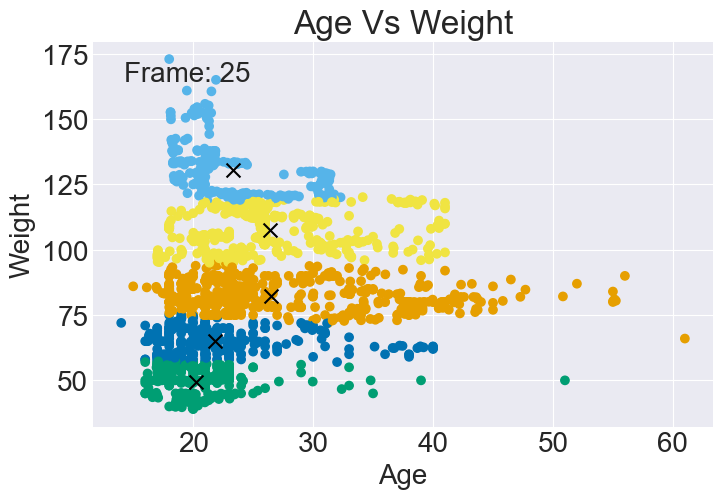

In [5]:
obesity_data = np.array(np.genfromtxt('data/ObesityDataSet.csv', delimiter = ',', skip_header = 1))[:,(1,3)]
obesity = kmeans.KMeans(obesity_data)
obesity.animate_clusters(5)
plt.title("Age Vs Weight")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

Hey, why's it not moving?

In [6]:
from IPython.display import Image
Image(url='kmeans.gif')  

### Slightly annoying inconveniences

#### 1. Gifs don't show up on Jupyter Notebook! >:(

Well, sorta, I just displayed it above, but I had to import a different module because it wouldn't show up just by running the method, so I had to export it externally as a gif and then display it again. The only reason why this is a problem was because I didn't know this, and so I was just looking at a blank image as the output above shows not knowing that the animation was working the entire time. A tad bit annoying if you ask me.

#### 2. MovieWriter Pillow unavailable; using Pillow instead...

There's that red error over there, which is caused by the code saving the animation as a gif and selecting a encoder to do so. It states that Pillow is unavailable but then states to use it, which doesn't really make sense, but I suppose it's not too much of a problem, just something to point out.

#### 3. My axis labels are gone :(

ax.cla clears everything, as in like, everything. This wouldn't cause much of a problem to the plot itself since we're scattering the same data points, only new clusters, but this also means I have to input the title and axis labels every time again. You may notice that only the ending image has those labels, which is because I put that in after the whole animation ran. The easy way to go around this is to put those set labels within the animate method, but that would make it difficult to have custom titles (in the hypothetical that I was going to look at other data sets and make an animation of the clustering)

This also has an easy fix which is to add more parameters, but I see that as unecessary... Maybe there's an easier fix, I don't know.


# KUDOS

As always, Professor Layton and the TAs have been a big help with troubleshooting because I often don't know what I'm doing. Special thanks to these few websites for teaching me how to animate K-means clustering with matplotlib, because I was definitely scratching my head at it!


https://nrsyed.com/2017/11/20/animating-k-means-clustering-in-2d-with-matplotlib/


https://www.kaggle.com/code/ryanholbrook/animating-k-means